# FedEx ML Study: Merged and Selected

In [1]:
# Load libraries
from pandas import read_csv
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from pandas import read_csv
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
df = pd.read_csv('df_merged.csv')
df.head(10)

,unnamed,GRADE_CD,GRADED_ROLE_CD,INSTRUCTOR_FX_ID,STUDENT_FX_ID,SEAT_POSITION_CD,OVERALL_GRADE_CD,FINAL_GRADE_CD,BOX_PERIOD_CD,TRAINING_SEGMENT_TYPE_CD,...,Large Turbo-Prop,Mil Transport,Rotor,Civilian,Military,Tot_Hours,GRADE_12,GRADE_4,GRADE_124,counts
0,23346,3,F,I226,P1,FO,S,3,E,M,...,NaN,NaN,NaN,9221,0,9221,0,0,0,3
1,356219,3,F,I273,P10,FO,S,3,C,M,...,NaN,NaN,NaN,3958,0,3958,0,0,0,1
2,870726,3,F,I169,P100,FO,S,3,B,M,...,NaN,NaN,NaN,13040,0,13040,0,0,0,3
3,870830,2,F,I144,P101,FO,S,2,C,M,...,NaN,NaN,NaN,7145,0,7145,1,0,1,3
4,870986,3,F,I191,P102,FO,S,3,D,M,...,1618.0,NaN,NaN,7,3824,3831,0,0,0,5
5,871104,3,F,I131,P103,FO,S,3,D,M,...,NaN,NaN,NaN,13432,0,13432,0,0,0,1
6,871241,3,F,I3,P104,FO,S,3,E,M,...,547.0,NaN,NaN,6723,0,6723,0,0,0,1
7,871343,3,F,I77,P105,FO,S,3,C,M,...,NaN,NaN,NaN,4962,0,4962,0,0,0,0
8,871454,3,F,I382,P106,FO,S,3,D,M,...,NaN,2382.0,NaN,58,2574,2632,0,0,0,4
9,871638,3,F,I322,P107,FO,S,3,C,M,...,NaN,3029.0,NaN,1232,3241,4473,0,0,0,1


In [3]:
df.shape

(679, 92)

In [4]:
df.columns

Index(['unnamed', 'GRADE_CD', 'GRADED_ROLE_CD', 'INSTRUCTOR_FX_ID',
       'STUDENT_FX_ID', 'SEAT_POSITION_CD', 'OVERALL_GRADE_CD',
       'FINAL_GRADE_CD', 'BOX_PERIOD_CD', 'TRAINING_SEGMENT_TYPE_CD',
       'CURRICULUM_TYPE_CD', 'EVENT_NM', 'AQP_FLEET_NM', 'GRADE_FAA_NM',
       'MEASURED_ITEM_NM', 'AUTO_ET_EVENTS_NBR', 'FIRST_LOOK_ELIGIBLE_FLG',
       'MEASURED_CAT', 'month_only', 'Month', 'Date', 'CQ', 'TRAINING',
       'TRN_START', 'REMARKS', 'COMMENTS_DESC', 'Aircraft Handling',
       'Automation', 'Checklists', 'Crew Communication', 'Decision Making',
       'External Resources', 'Flow', 'Leadership & Teamwork', 'Policy',
       'Procedures', 'Situational Awareness', 'Systems Knowledge',
       'Technical Proficiency', 'LAND30', 'LAND60', 'LAND90', 'LAND180',
       'BLK30', 'BLK60', 'BLK90', 'BLK180', 'LOA90', 'LOA180', 'LOA365',
       'PRIM_CLASS_CD', 'Daily_Skd_Date', 'Fleet', 'SENIORITYDATE',
       'SICK_SCORE', 'ACTIVATION_DT', 'Days_In_Seat', 'SOURCE_TRAINING',
      

In [5]:
#droping the transition
df.drop(df[df['TRAINING']=='ITU 11FO > 67FO'].index, inplace=True)
df.drop(df[df['TRAINING']=='ITU 57FO > 11FO'].index, inplace=True)
df.drop(df[df['TRAINING']=='ITU 57FO > 30FO'].index, inplace=True)
df.drop(df[df['TRAINING']=='ITU 57FO > 77FO'].index, inplace=True)

In [6]:
df.drop(df[df['TRAINING']=='ITU -- > 57CA'].index, inplace=True)
df.drop(df[df['TRAINING']=='ITU -CA > 57CA'].index, inplace=True)

In [7]:
df = df.filter(['EDUCLEVEL','PRO_HS_GPA','INSTRUCTOR_FX_ID','SOURCE_TRAINING','TRAINING','SCH_GPA','Military','Civilian','Tot_Hours','counts'], axis=1)

In [8]:
# check number & percentage of missing value in the columns
def missing_values_table(df):
    mis_val = df.isnull().sum() #total missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df) #percentage of missing values
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #make a table with the results
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #rename the columns
     # sort the table by percentage of missing value
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

        #print same summary information
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

          # return the dataframe with missing information
    return mis_val_table_ren_columns

 # missing values statistics
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
PRO_HS_GPA,12,1.8
SOURCE_TRAINING,1,0.1


In [9]:
df = df.dropna(how='any', subset=['PRO_HS_GPA','SOURCE_TRAINING'])

In [10]:
# check number & percentage of missing value in the columns
def missing_values_table(df):
    mis_val = df.isnull().sum() #total missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df) #percentage of missing values
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #make a table with the results
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #rename the columns
     # sort the table by percentage of missing value
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

        #print same summary information
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

          # return the dataframe with missing information
    return mis_val_table_ren_columns

 # missing values statistics
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# SOURCE_TRAINING

In [11]:
df["SOURCE_TRAINING"].replace({"Other Pilot Training Type": "0", "Other Part 141": "1","Part 141 Aeronautical School": "2", 
                               "Four Year College Program 141": "3", "Air Force": "4", "Army": "5", 
                               "Navy/Marine/Coast Guard": "6"}, inplace=True)
df["SOURCE_TRAINING"] = df["SOURCE_TRAINING"].astype(int)
df['SOURCE_TRAINING']=pd.cut(df['SOURCE_TRAINING'], bins=[0,2,3,4,6], include_lowest=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.SOURCE_TRAINING =le.fit_transform(df.SOURCE_TRAINING)

In [12]:
df.groupby(['SOURCE_TRAINING']).size()

SOURCE_TRAINING
0    222
1    130
2    213
3     97
dtype: int64

# PRO_HS_GPA

In [13]:
#Cleaning pro_hs_gpa columns and converting into the float type
df["PRO_HS_GPA"].replace({"4.5 weighted": "4.5", "95.25": "4.5","92.427": "4", "97%": "4.5", 
                          "Pass": "3", "Unknown": "3", "na": "3"}, inplace=True)
df['PRO_HS_GPA'] = df['PRO_HS_GPA'].astype(float)
df['PRO_HS_GPA']=pd.cut(df['PRO_HS_GPA'], bins=[0,2.99,5], include_lowest=True)
df.PRO_HS_GPA =le.fit_transform(df.PRO_HS_GPA)
df['PRO_HS_GPA']=df['PRO_HS_GPA'].replace([0], 2)
df['PRO_HS_GPA']=df['PRO_HS_GPA'].replace([1], 0)
df['PRO_HS_GPA']=df['PRO_HS_GPA'].replace([2], 1)

In [14]:
df.groupby(['PRO_HS_GPA']).size()

PRO_HS_GPA
0    528
1    134
dtype: int64

# SCH_GPA

In [15]:
df["SCH_GPA"] = df["SCH_GPA"].astype(float)
df['SCH_GPA']=pd.cut(df['SCH_GPA'], bins=[0,2.99,4], include_lowest=True)
df.SCH_GPA =le.fit_transform(df.SCH_GPA)
df['SCH_GPA']=df['SCH_GPA'].replace([0], 2)
df['SCH_GPA']=df['SCH_GPA'].replace([1], 0)
df['SCH_GPA']=df['SCH_GPA'].replace([2], 1)

In [16]:
df.groupby(['SCH_GPA']).size()

SCH_GPA
0    481
1    181
dtype: int64

# EDUCLEVEL

In [17]:
df["EDUCLEVEL"].replace({"Graduate Degree": "0", "Some Graduate Credit": "1", "Masters Degree": "2","Doctorate": "3", 
                         "Military Academy Graduate": "4", "Bachelors Degree": "5"}, inplace=True)
df["EDUCLEVEL"] = df["EDUCLEVEL"].astype(int)
df['EDUCLEVEL']=pd.cut(df['EDUCLEVEL'], bins=[0,3,4,5], include_lowest=True)
df.EDUCLEVEL =le.fit_transform(df.EDUCLEVEL)

In [18]:
df.groupby(['EDUCLEVEL']).size()

EDUCLEVEL
0    254
1     25
2    383
dtype: int64

# Civilian

In [19]:
df['Civilian']=pd.cut(df['Civilian'], bins=[0,2000,7000,15846], include_lowest=True)
df.Civilian =le.fit_transform(df.Civilian)
df['Civilian']=df['Civilian'].replace([0], 3)
df['Civilian']=df['Civilian'].replace([2], 0)
df['Civilian']=df['Civilian'].replace([3], 2)

In [20]:
df.groupby(['Civilian']).size()

Civilian
0    181
1    206
2    275
dtype: int64

# Military

In [21]:
df['Military']=pd.cut(df['Military'], bins=[0,700,2500,8030], include_lowest=True)
df.Military =le.fit_transform(df.Military)
df['Military']=df['Military'].replace([0], 3)
df['Military']=df['Military'].replace([2], 0)
df['Military']=df['Military'].replace([3], 2)

In [22]:
df.groupby(['Military']).size()

Military
0    196
1    116
2    350
dtype: int64

# Tot_Hours

In [23]:
df['Tot_Hours']=pd.cut(df['Tot_Hours'], bins=[0,4000,7000,15846], include_lowest=True)
df.Tot_Hours =le.fit_transform(df.Tot_Hours)
df['Tot_Hours']=df['Tot_Hours'].replace([0], 3)
df['Tot_Hours']=df['Tot_Hours'].replace([2], 0)
df['Tot_Hours']=df['Tot_Hours'].replace([3], 2)

In [24]:
df.groupby(['Military']).size()

Military
0    196
1    116
2    350
dtype: int64

# counts

In [25]:
df['counts']=df['counts'].replace([1,2,3,4, 5, 6, 7,8,9,10,16], 1)

In [26]:
df.groupby(['counts']).size()

counts
0    246
1    416
dtype: int64

# TRAINING

In [27]:
df["TRAINING"].replace({"ITU 11FO > 11FO": "0", "ITU 30FO > 30FO": "1", "ITU 57FO > 57FO": "2","ITU 67FO > 67FO": "3", 
                         "ITU 77FO > 77FO": "4"}, inplace=True)
df["TRAINING"] = df["TRAINING"].astype(int)

In [28]:
df.groupby(['TRAINING']).size()

TRAINING
0    154
1    106
2    257
3     72
4     73
dtype: int64

# Instructor FX ID

In [29]:
percentage = df.groupby('INSTRUCTOR_FX_ID').counts.transform(lambda x: sum(x > 0) / len(x))
df.insert(2, "percentages", percentage)

In [30]:
df['percentages']=pd.cut(df['percentages'], bins=[0,0.3,0.7,1], include_lowest=True)

In [31]:
df.percentages =le.fit_transform(df.percentages)

In [32]:
df = df.filter(['EDUCLEVEL','PRO_HS_GPA','percentages','SOURCE_TRAINING','TRAINING','SCH_GPA','Military','Civilian','Tot_Hours','counts'], axis=1)

In [38]:
df['percentages']

0      2
1      2
2      2
3      1
4      2
5      1
6      0
7      0
8      2
9      2
10     2
11     1
12     2
13     1
14     1
15     2
16     2
17     2
18     2
19     2
20     1
21     1
22     2
23     1
25     2
26     2
27     1
28     1
29     2
30     1
      ..
649    1
650    0
651    1
652    2
653    0
654    2
655    0
656    1
657    2
658    0
659    1
660    1
661    2
662    0
663    1
664    1
665    1
666    1
667    0
668    1
669    2
670    2
671    2
672    1
673    2
674    2
675    1
676    1
677    1
678    1
Name: percentages, Length: 662, dtype: int64

In [33]:
df.dtypes

EDUCLEVEL          int64
PRO_HS_GPA         int64
percentages        int64
SOURCE_TRAINING    int64
TRAINING           int32
SCH_GPA            int64
Military           int64
Civilian           int64
Tot_Hours          int64
counts             int64
dtype: object

In [36]:
#class distributions
for columns in df:
    count = df.groupby([columns]).size() 
    print(count)

EDUCLEVEL
0    254
1     25
2    383
dtype: int64
PRO_HS_GPA
0    528
1    134
dtype: int64
percentages
0     80
1    318
2    264
dtype: int64
SOURCE_TRAINING
0    222
1    130
2    213
3     97
dtype: int64
TRAINING
0    154
1    106
2    257
3     72
4     73
dtype: int64
SCH_GPA
0    481
1    181
dtype: int64
Military
0    196
1    116
2    350
dtype: int64
Civilian
0    181
1    206
2    275
dtype: int64
Tot_Hours
0    200
1    215
2    247
dtype: int64
counts
0    246
1    416
dtype: int64


In [37]:
unique = df.nunique()
print(unique)

EDUCLEVEL          3
PRO_HS_GPA         2
percentages        3
SOURCE_TRAINING    4
TRAINING           5
SCH_GPA            2
Military           3
Civilian           3
Tot_Hours          3
counts             2
dtype: int64


In [38]:
# descriptions of the data
df.describe()

,EDUCLEVEL,PRO_HS_GPA,percentages,SOURCE_TRAINING,TRAINING,SCH_GPA,Military,Civilian,Tot_Hours,counts
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,1.194864,0.202417,1.277946,1.279456,1.703927,0.273414,1.232628,1.141994,1.070997,0.628399
std,0.962113,0.402105,0.665622,1.080217,1.247066,0.446049,0.878535,0.818334,0.819268,0.483598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000
75%,2.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,1.000000


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


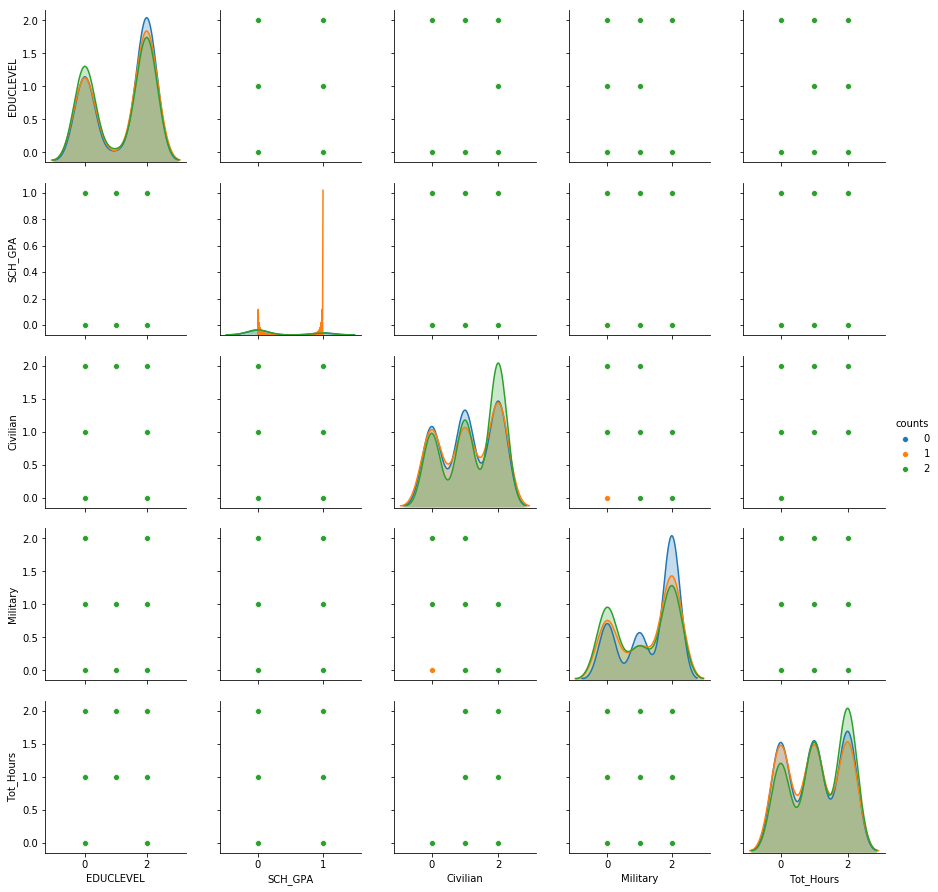

In [38]:
import seaborn as sns
sns.pairplot(df, hue='counts', vars=['EDUCLEVEL', 'SCH_GPA','Civilian', 'Military', 'Tot_Hours'])

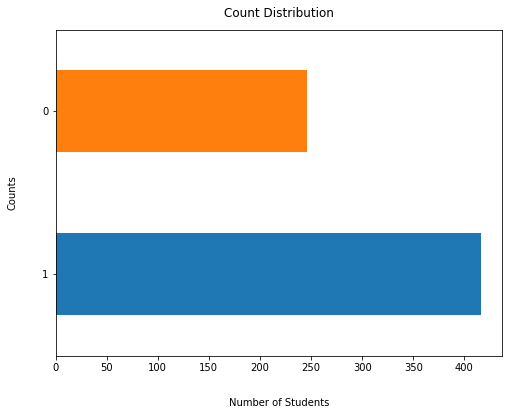

In [34]:
# basic visualization of the dataset
import matplotlib.pyplot as plt
df['counts'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Number of Students", labelpad=25)
plt.ylabel("Counts", labelpad=25)
plt.title("Count Distribution", y=1.02);
plt.savefig('counts')

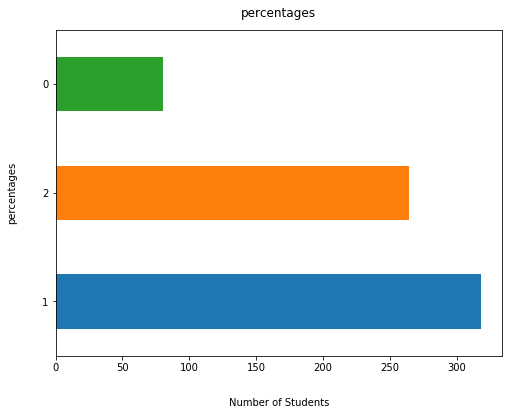

In [36]:
import matplotlib.pyplot as plt
df['percentages'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Number of Students", labelpad=25)
plt.ylabel("percentages", labelpad=25)
plt.title("percentages", y=1.02);
plt.savefig('percentages')

In [35]:
df.columns

Index(['EDUCLEVEL', 'PRO_HS_GPA', 'percentages', 'SOURCE_TRAINING', 'TRAINING',
       'SCH_GPA', 'Military', 'Civilian', 'Tot_Hours', 'counts'],
      dtype='object')

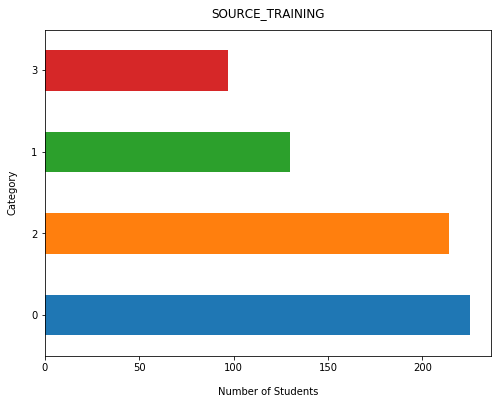

In [34]:
df['SOURCE_TRAINING'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Category", labelpad=14)
plt.title("SOURCE_TRAINING", y=1.02);
plt.savefig('source')

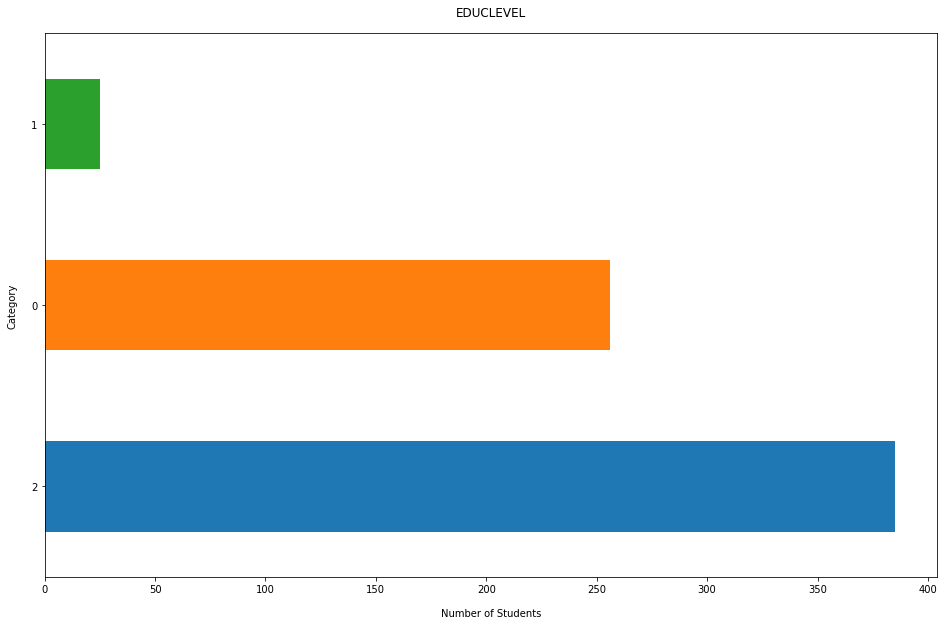

In [35]:
df['EDUCLEVEL'].value_counts().plot(kind='barh', figsize=(16, 10))
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Category", labelpad=14)
plt.title("EDUCLEVEL", y=1.02);
plt.savefig('edu')

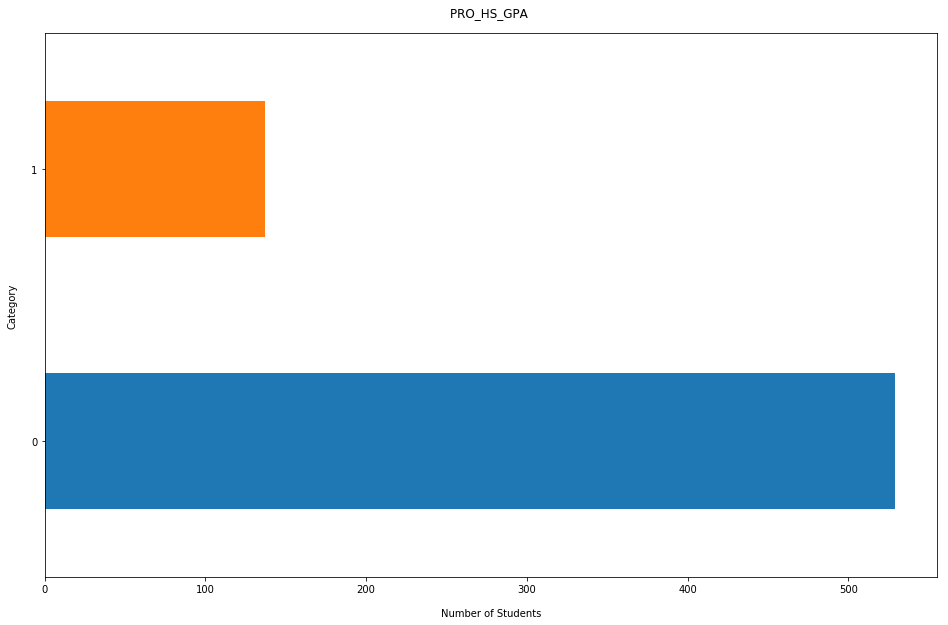

In [36]:
df['PRO_HS_GPA'].value_counts().plot(kind='barh', figsize=(16, 10))
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Category", labelpad=14)
plt.title("PRO_HS_GPA ", y=1.02);
plt.savefig('GPA')

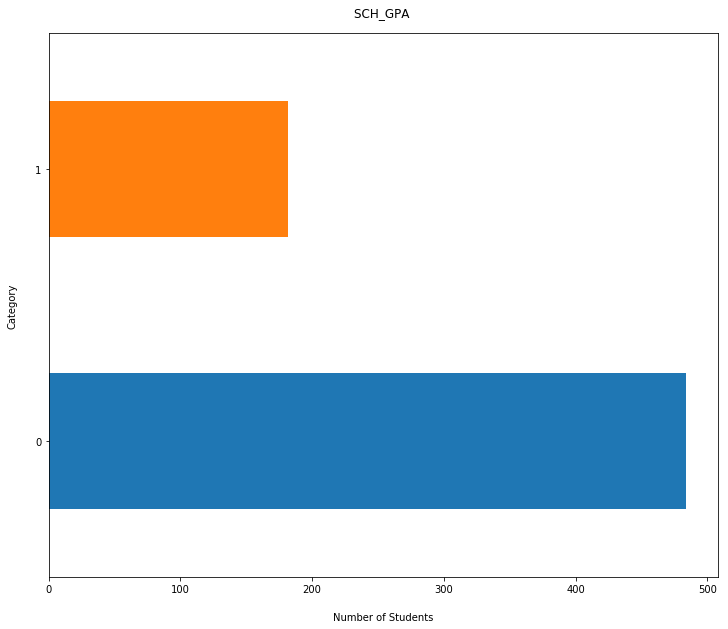

In [37]:
df['SCH_GPA'].value_counts().plot(kind='barh', figsize=(12, 10))
plt.xlabel("Number of Students", labelpad=18)
plt.ylabel("Category", labelpad=18)
plt.title("SCH_GPA ", y=1.02);
plt.savefig('SCH_GPA')

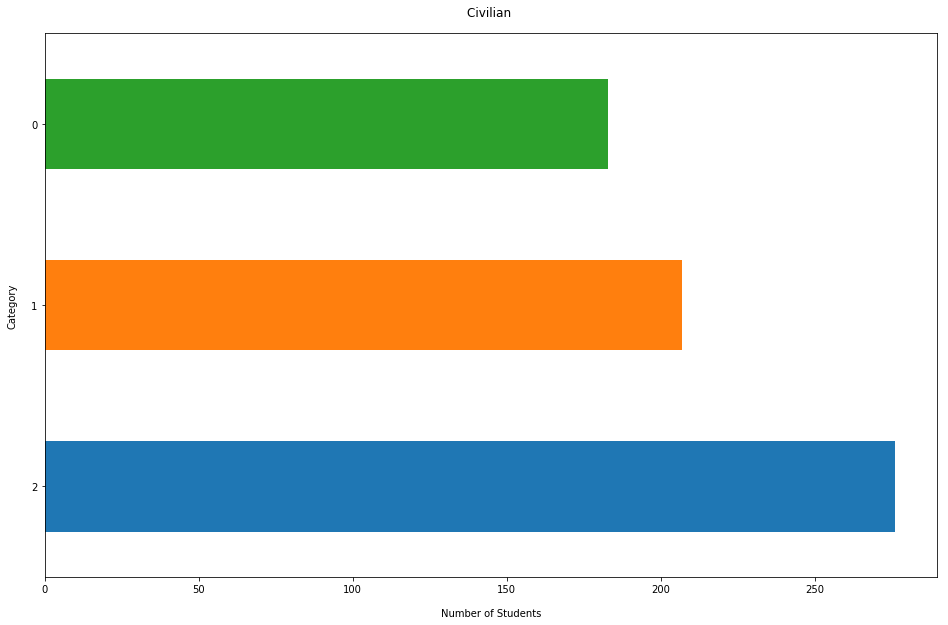

In [39]:
df['Civilian'].value_counts().plot(kind='barh', figsize=(16, 10))
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Category", labelpad=14)
plt.title("Civilian ", y=1.02);
plt.savefig('Civilian')

In [40]:
df.columns

Index(['EDUCLEVEL', 'PRO_HS_GPA', 'SOURCE_TRAINING', 'SCH_GPA', 'Military',
       'Civilian', 'Tot_Hours', 'counts'],
      dtype='object')

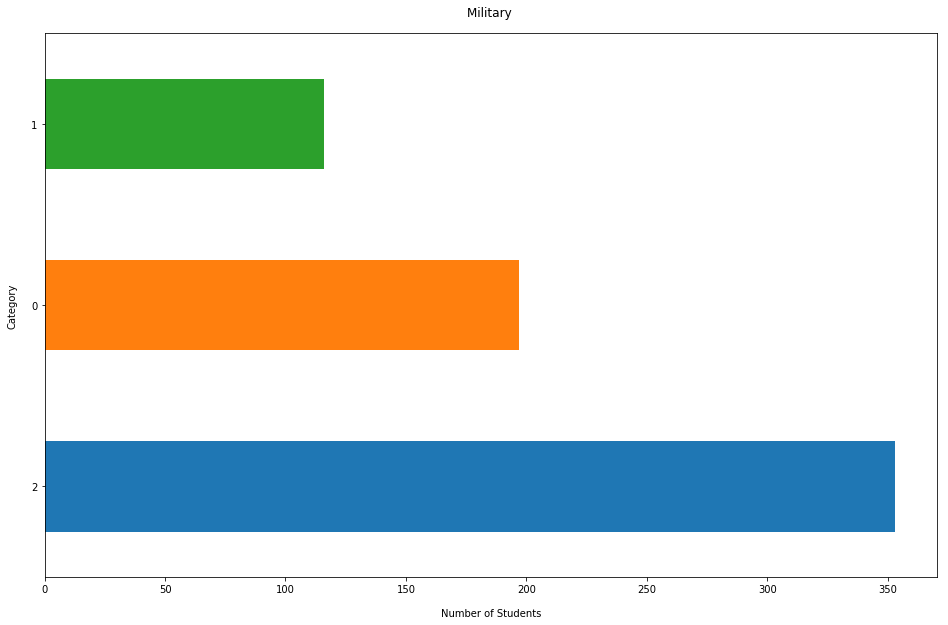

In [41]:
df['Military'].value_counts().plot(kind='barh', figsize=(16, 10))
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Category", labelpad=14)
plt.title("Military ", y=1.02);
plt.savefig('Military')

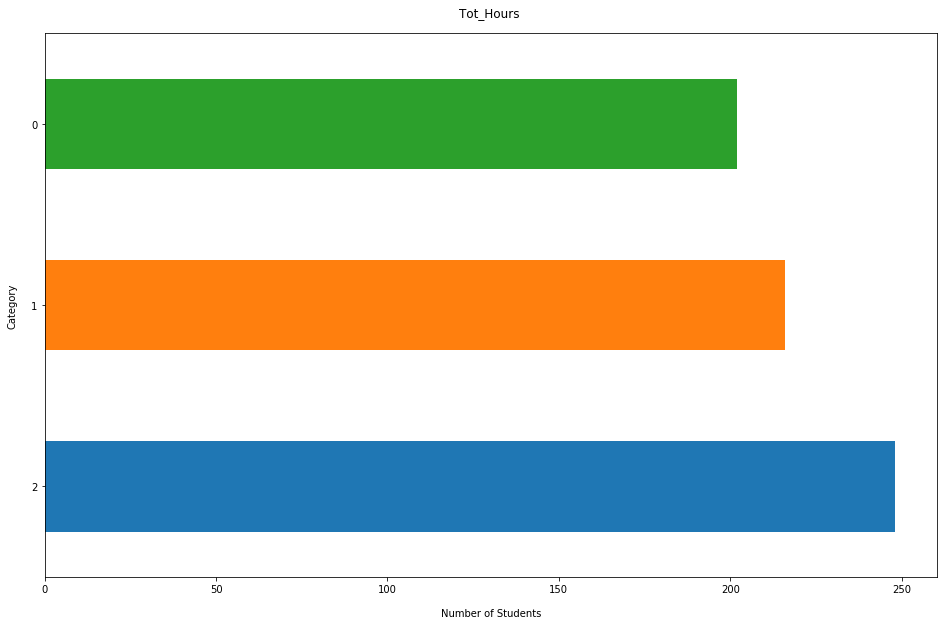

In [42]:
df['Tot_Hours'].value_counts().plot(kind='barh', figsize=(16, 10))
plt.xlabel("Number of Students", labelpad=14)
plt.ylabel("Category", labelpad=14)
plt.title("Tot_Hours ", y=1.02);
plt.savefig('Tot_Hours')

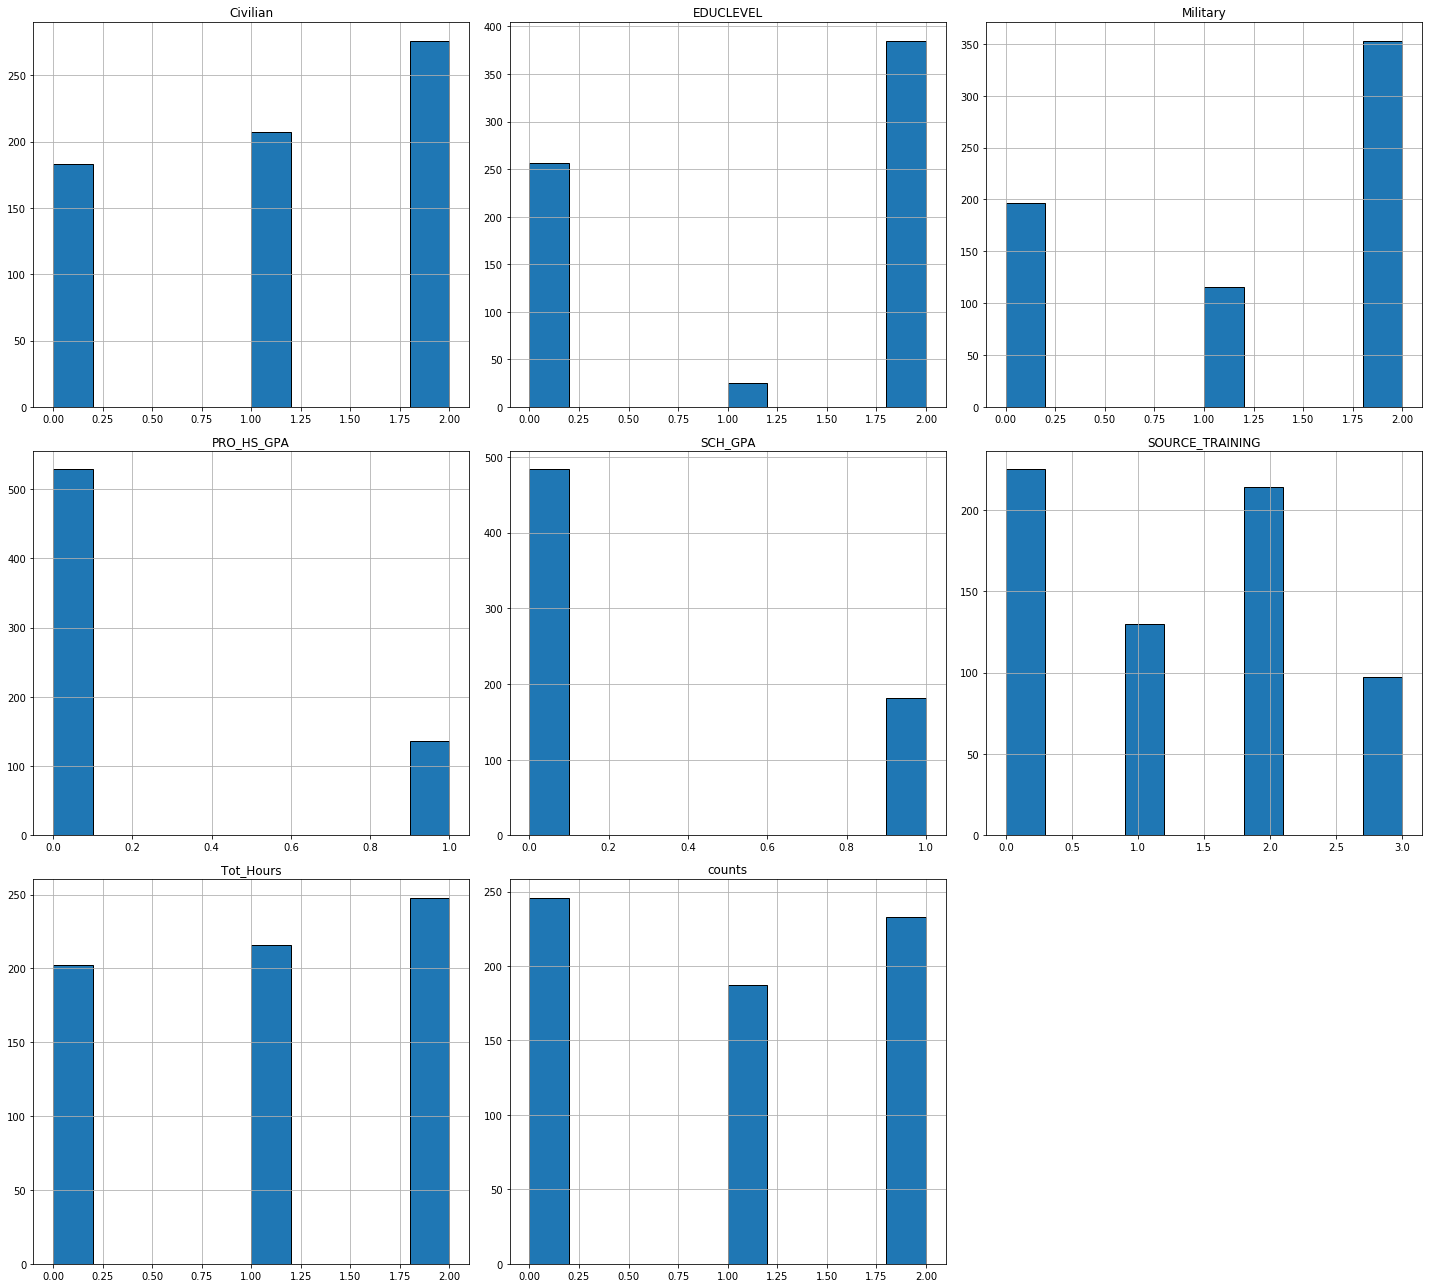

In [43]:
df.hist(figsize=(20,18), ec="k")

plt.tight_layout()
plt.show()

In [39]:
#correlation matrix
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)
correlations.to_csv('corr.csv')

                 EDUCLEVEL  PRO_HS_GPA  percentages  SOURCE_TRAINING  TRAINING  SCH_GPA  Military  \
EDUCLEVEL            1.000       0.117       -0.014           -0.482    -0.020    0.299     0.600   
PRO_HS_GPA           0.117       1.000       -0.001           -0.162     0.005    0.197     0.158   
percentages         -0.014      -0.001        1.000            0.005     0.107   -0.063    -0.036   
SOURCE_TRAINING     -0.482      -0.162        0.005            1.000    -0.032   -0.175    -0.792   
TRAINING            -0.020       0.005        0.107           -0.032     1.000   -0.017     0.031   
SCH_GPA              0.299       0.197       -0.063           -0.175    -0.017    1.000     0.185   
Military             0.600       0.158       -0.036           -0.792     0.031    0.185     1.000   
Civilian            -0.529      -0.156        0.016            0.737    -0.031   -0.165    -0.791   
Tot_Hours           -0.417      -0.154        0.069            0.552    -0.005   -0.132    

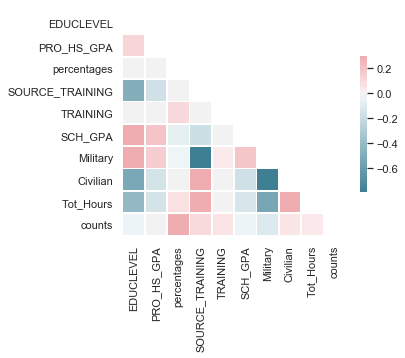

In [41]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


d = pd.DataFrame(df)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

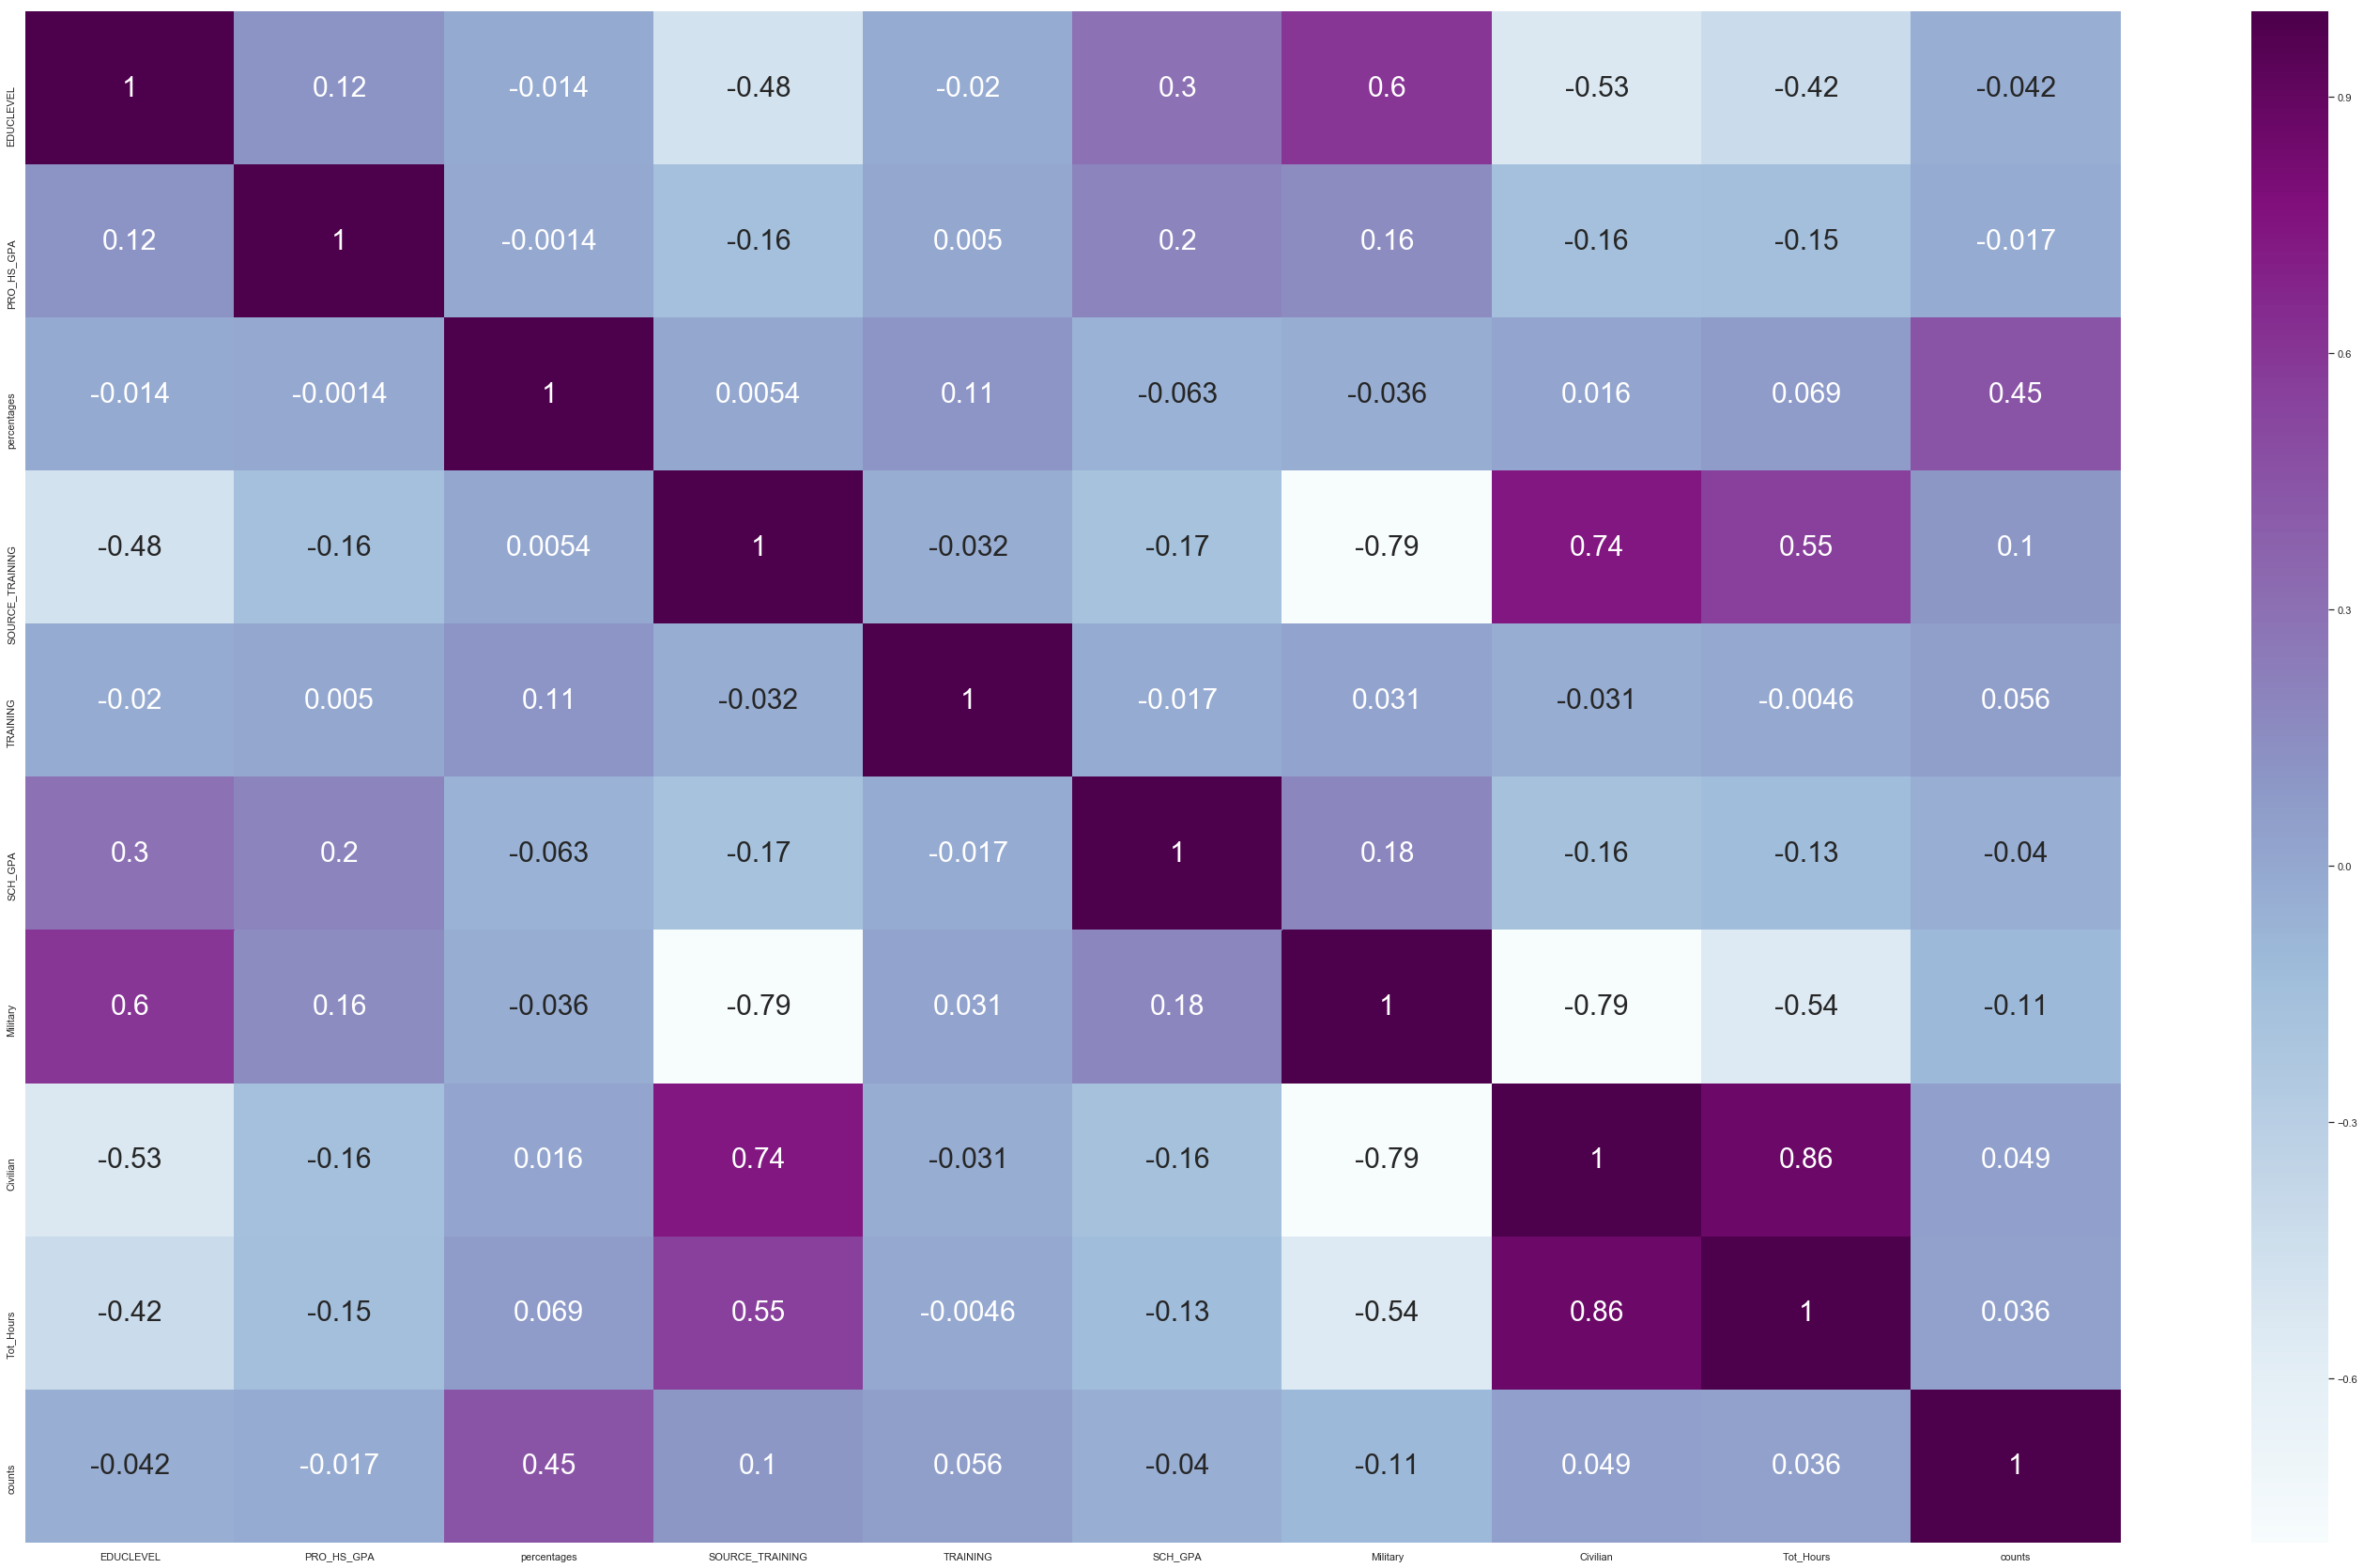

In [42]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(), cmap="BuPu", annot_kws={"size":30},annot=True)
sns.set(font_scale=4.5)
plt.savefig('corpurple.jpeg')

In [47]:
df.columns

Index(['EDUCLEVEL', 'PRO_HS_GPA', 'SOURCE_TRAINING', 'SCH_GPA', 'Military', 'Civilian',
       'Tot_Hours', 'counts'],
      dtype='object')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


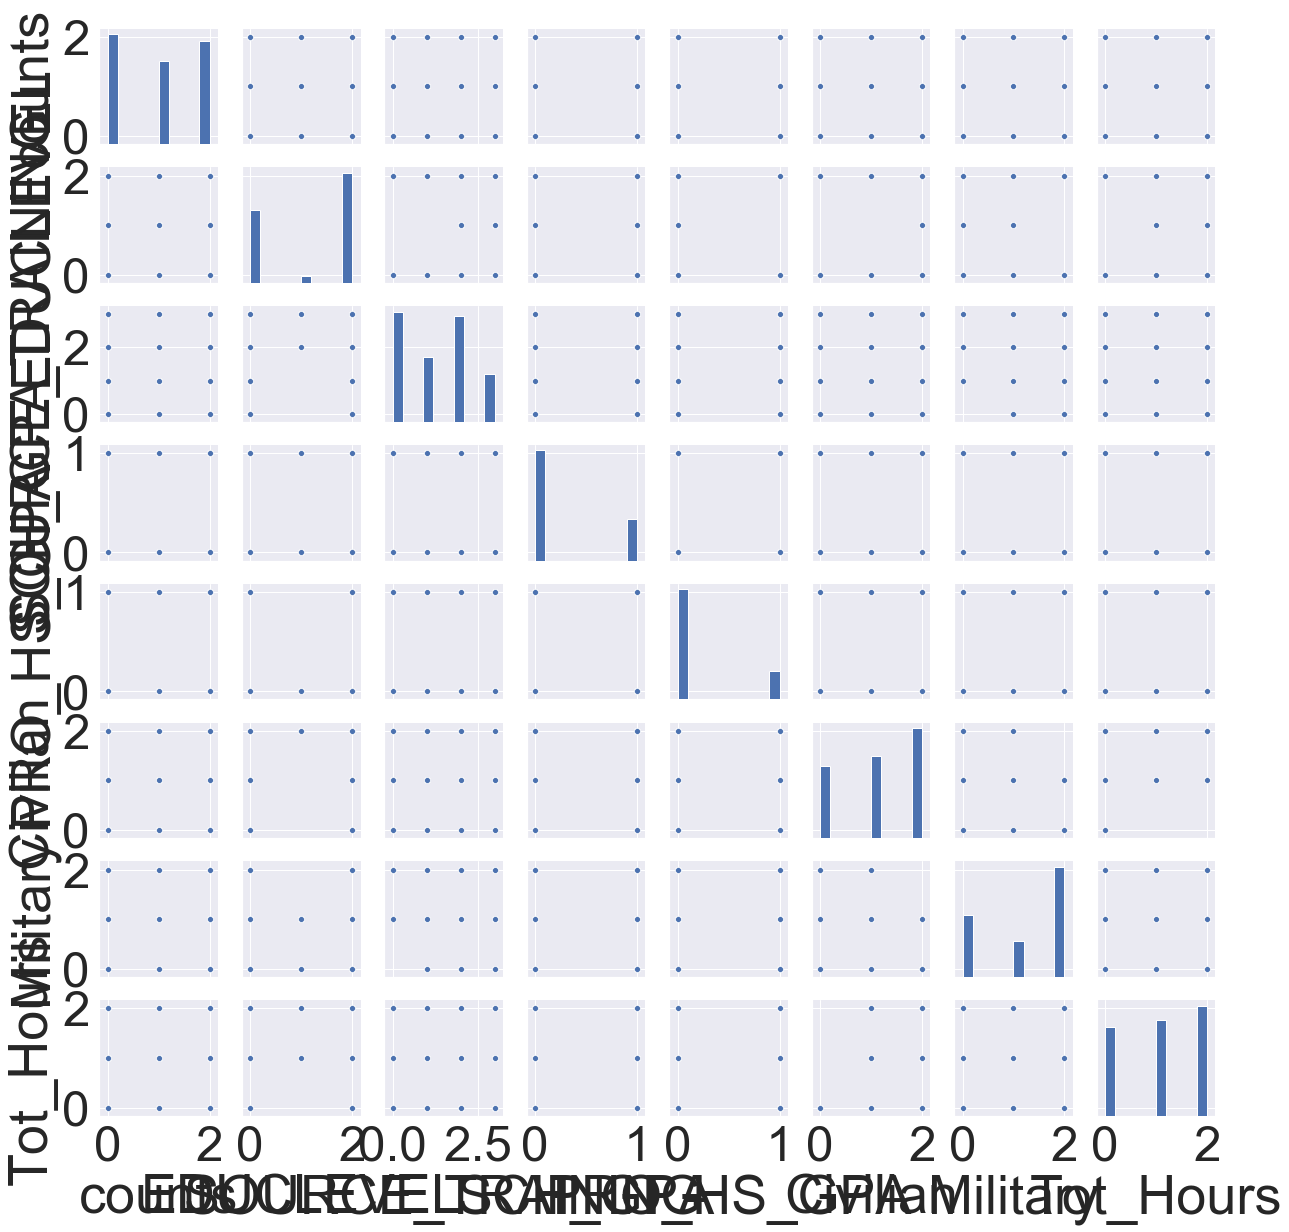

In [42]:
import seaborn as sns
data_features = df[['counts', 'EDUCLEVEL','SOURCE_TRAINING','SCH_GPA','PRO_HS_GPA', 'Civilian', 'Military', 'Tot_Hours']]
sns.pairplot(data_features)
sns.set(font_scale=2.5)
plt.savefig('mat.jpeg')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


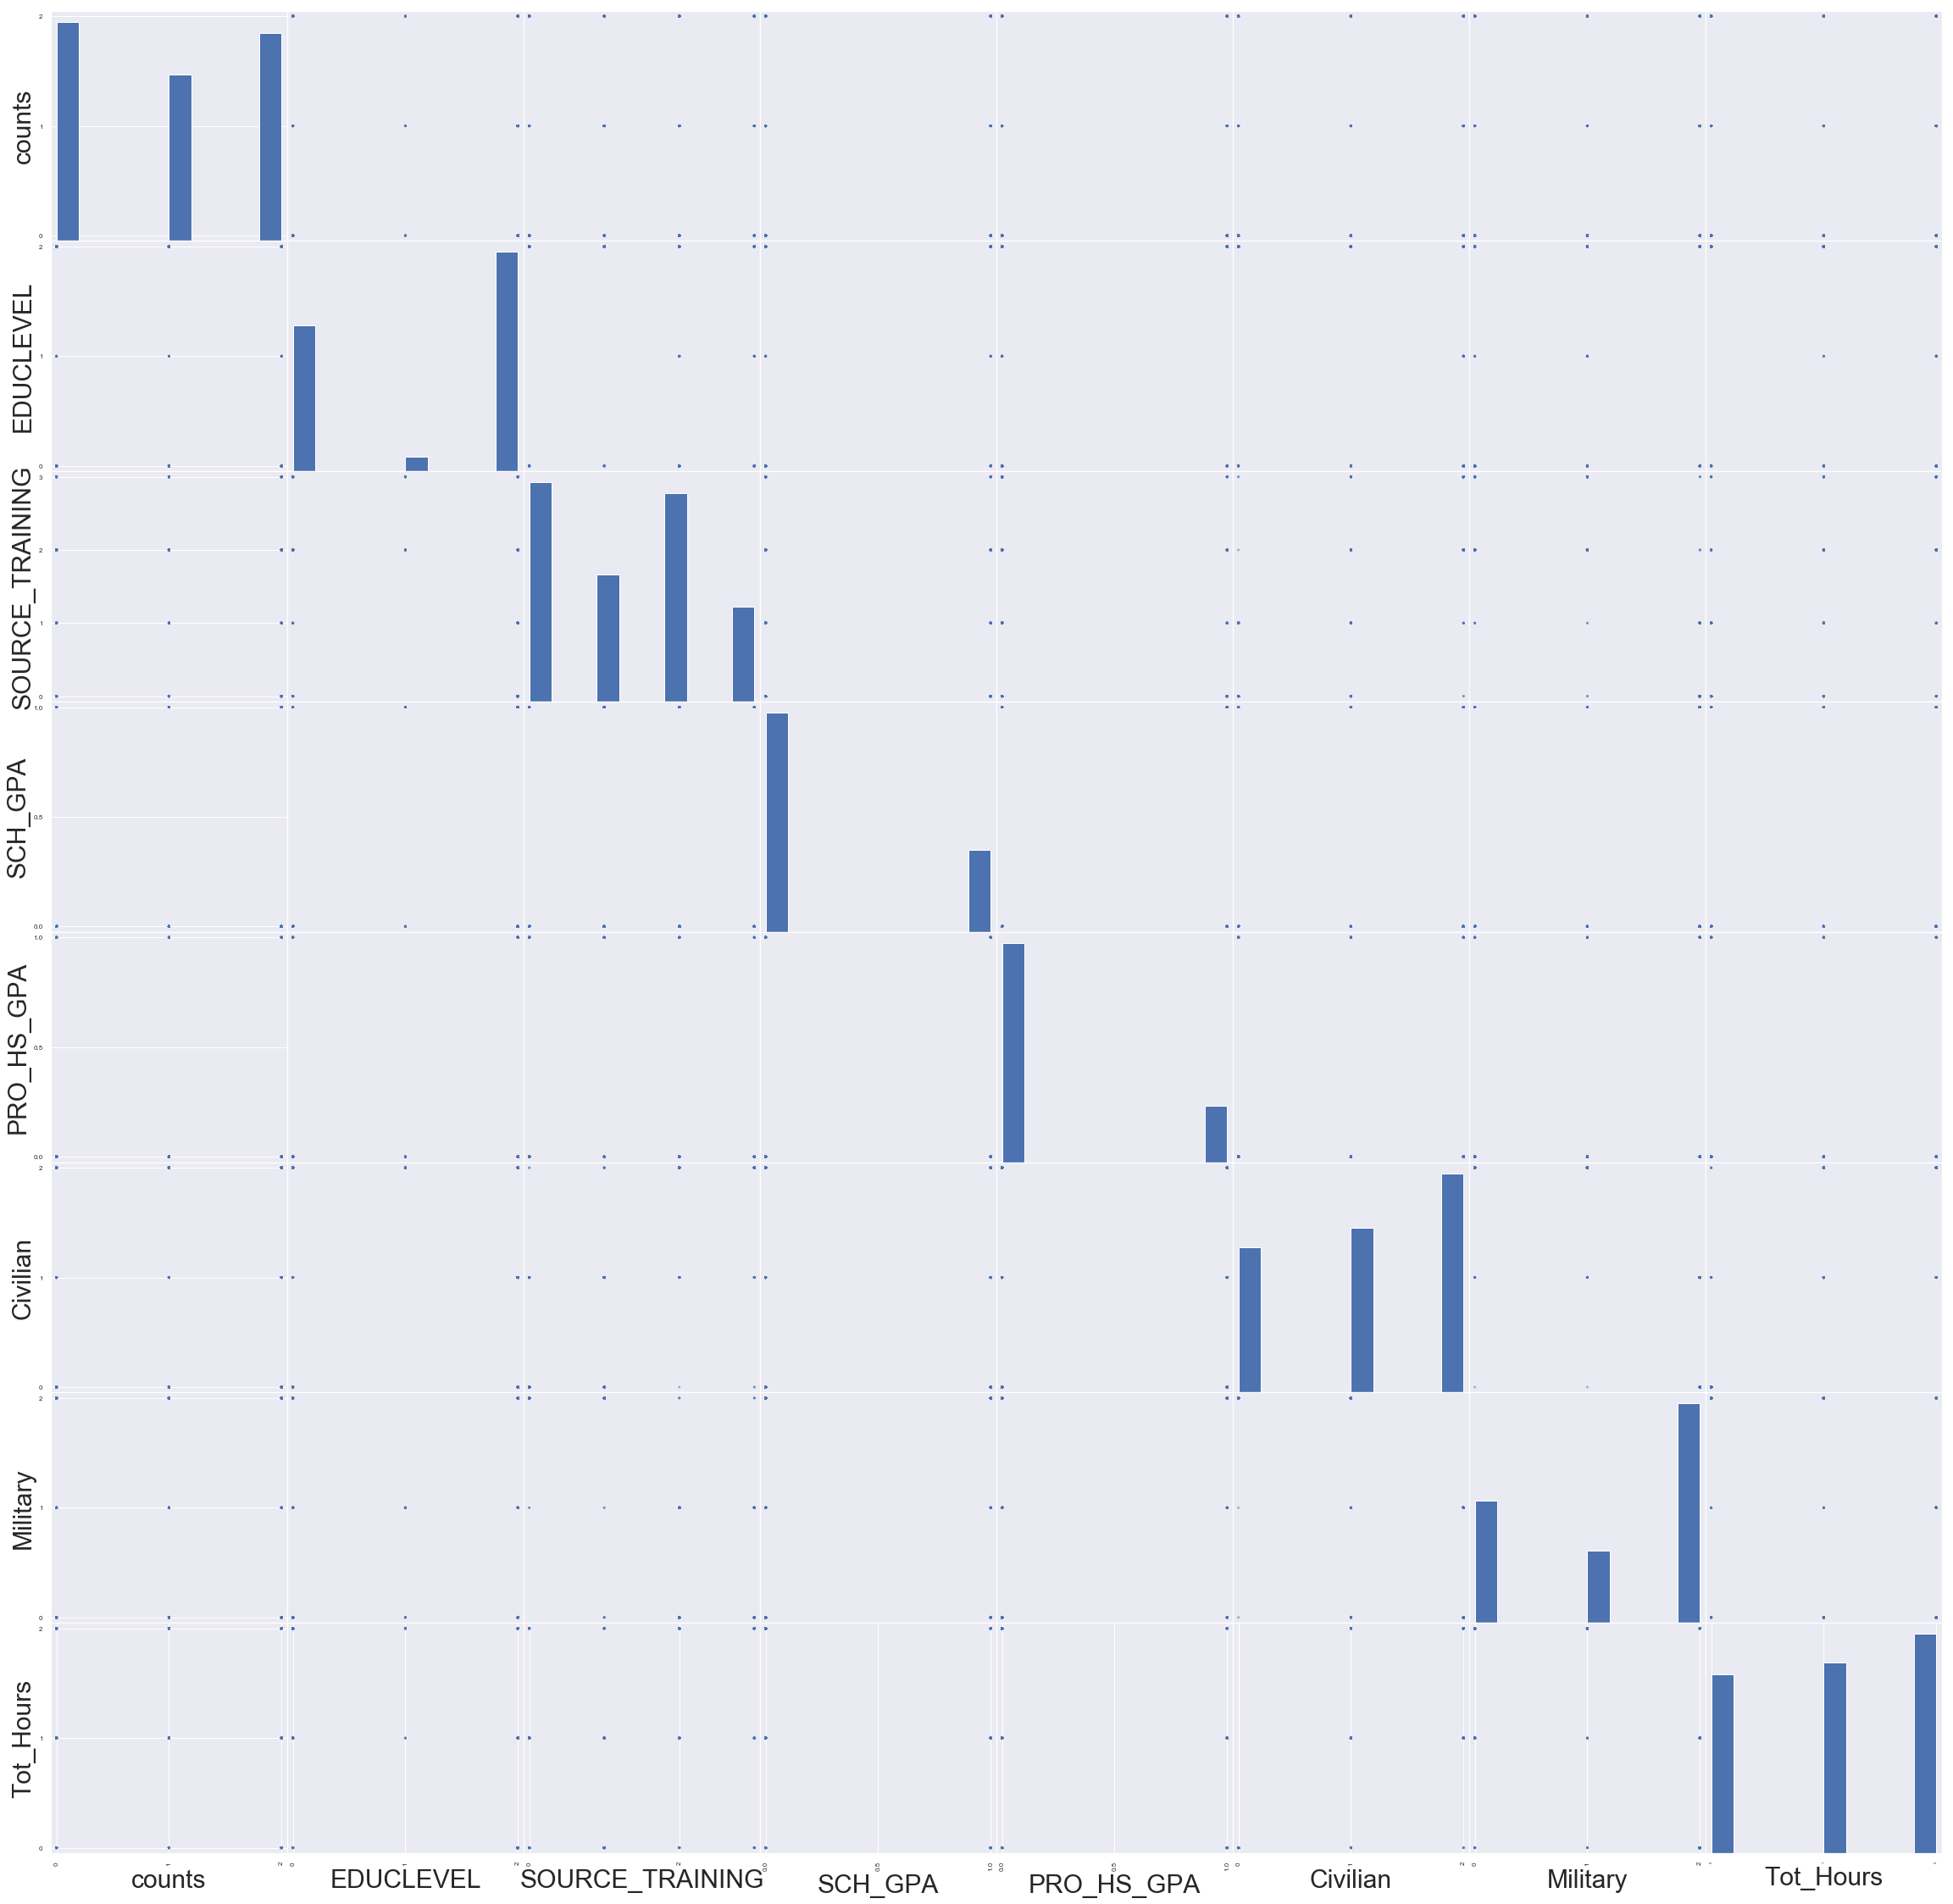

In [49]:
plot=pd.scatter_matrix(data_features,figsize  = [40, 40] )
plt.xticks(fontsize = 4, rotation = 90)
plt.yticks(fontsize = 4)
plt.savefig('sct.jpeg')

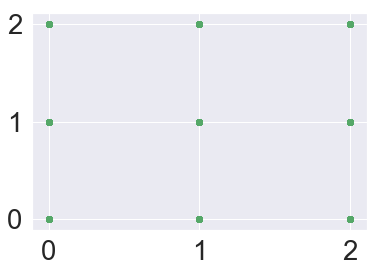

In [50]:
plt.scatter(df['counts'], df['Civilian'], color='g', alpha=0.6)

In [39]:
# Corralation matrix with colormaps
import pandas as pd
import numpy as np
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,EDUCLEVEL,PRO_HS_GPA,percentages,SOURCE_TRAINING,TRAINING,SCH_GPA,Military,Civilian,Tot_Hours,counts
EDUCLEVEL,1,0.116878,-0.0138315,-0.481897,-0.0199307,0.298693,0.599579,-0.529023,-0.416796,-0.0424762
PRO_HS_GPA,0.116878,1,-0.00138321,-0.161773,0.00504953,0.197059,0.157716,-0.156442,-0.153905,-0.0171581
percentages,-0.0138315,-0.00138321,1,0.00542862,0.106578,-0.0627165,-0.0357112,0.016312,0.0691801,0.448249
SOURCE_TRAINING,-0.481897,-0.161773,0.00542862,1,-0.0316998,-0.174516,-0.792349,0.737162,0.551929,0.100626
TRAINING,-0.0199307,0.00504953,0.106578,-0.0316998,1,-0.0174359,0.0312008,-0.0313821,-0.00456752,0.0556052
SCH_GPA,0.298693,0.197059,-0.0627165,-0.174516,-0.0174359,1,0.184902,-0.164546,-0.131858,-0.0402585
Military,0.599579,0.157716,-0.0357112,-0.792349,0.0312008,0.184902,1,-0.790939,-0.544254,-0.106019
Civilian,-0.529023,-0.156442,0.016312,0.737162,-0.0313821,-0.164546,-0.790939,1,0.862732,0.049431
Tot_Hours,-0.416796,-0.153905,0.0691801,0.551929,-0.00456752,-0.131858,-0.544254,0.862732,1,0.0361427
counts,-0.0424762,-0.0171581,0.448249,0.100626,0.0556052,-0.0402585,-0.106019,0.049431,0.0361427,1


In [44]:
from sklearn.model_selection import train_test_split
y=df.counts
x=df.drop('counts',axis=1)
seed = 7
validation_size=0.25
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size, random_state=seed)
x_train.head()

,EDUCLEVEL,PRO_HS_GPA,percentages,SOURCE_TRAINING,TRAINING,SCH_GPA,Military,Civilian,Tot_Hours
529,0,0,1,0,2,0,2,1,2
99,2,0,1,0,4,0,2,1,1
604,2,1,2,0,2,0,2,1,2
614,2,0,2,0,1,0,2,0,0
468,2,1,1,0,0,0,2,0,0


In [45]:
#Univariate Selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print 20 best features

             Specs   Score
2      percentages  46.045
3  SOURCE_TRAINING   6.104
6         Military   4.652
4         TRAINING   1.865
7         Civilian   0.947
0        EDUCLEVEL   0.924
5          SCH_GPA   0.780
8        Tot_Hours   0.541
1       PRO_HS_GPA   0.155


[0.09133297 0.05858762 0.31520741 0.1120724  0.20240652 0.06036889
 0.05062451 0.04146272 0.06793697]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


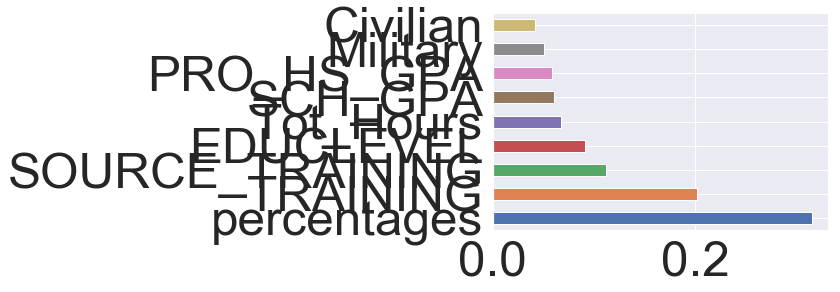

<Figure size 432x288 with 0 Axes>

In [46]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
plt.savefig('score')

In [47]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 3
Selected Features: [False False  True False False False  True  True False]
Feature Ranking: [4 5 1 2 6 7 1 1 3]


In [48]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.683551 (0.058367)
LDA: 0.671347 (0.072172)
KNN: 0.639224 (0.094113)
CART: 0.634980 (0.063134)
NB: 0.679469 (0.084444)
SVM: 0.647061 (0.062565)


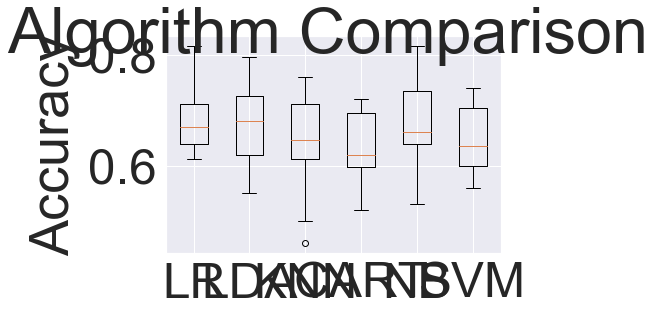

<Figure size 432x288 with 0 Axes>

In [49]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
plt.ylabel("Accuracy", labelpad=7)
ax.set_xticklabels(names)
pyplot.show()
pyplot.savefig('comp.jpeg')

# LR : LogisticRegression()

In [50]:
# Make predictions on validation dataset (LR)
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7289156626506024
[[26 32]
 [13 95]]
             precision    recall  f1-score   support

          0       0.67      0.45      0.54        58
          1       0.75      0.88      0.81       108

avg / total       0.72      0.73      0.71       166



In [51]:
# Confusion matrix for the training set (LR)
y_train_pred = LR.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print(accuracy_score(y_train, y_train_pred))
print (cm_train)

0.7116935483870968
[[ 96  92]
 [ 51 257]]


# LDA : LinearDiscriminantAnalysis()

In [52]:
# Make predictions on validation dataset (LDA)
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
y_pred = LDA.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7228915662650602
[[27 31]
 [15 93]]
             precision    recall  f1-score   support

          0       0.64      0.47      0.54        58
          1       0.75      0.86      0.80       108

avg / total       0.71      0.72      0.71       166



In [53]:
# Confusion matrix for the training set (LDA)
y_train_pred = LDA.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print(accuracy_score(y_train, y_train_pred))
print (cm_train)

0.6975806451612904
[[100  88]
 [ 62 246]]


# CART : DecisionTreeClassifier()

In [54]:
#Make predictions on validation dataset (CART)
CART = DecisionTreeClassifier()
CART.fit(x_train, y_train)
y_pred = CART.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6265060240963856
[[34 24]
 [38 70]]
             precision    recall  f1-score   support

          0       0.47      0.59      0.52        58
          1       0.74      0.65      0.69       108

avg / total       0.65      0.63      0.63       166



In [55]:
# Confusion matrix for the training set (CART)
y_train_pred = CART.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print(accuracy_score(y_train, y_train_pred))
print (cm_train)

0.9012096774193549
[[169  19]
 [ 30 278]]


# KNN : KNeighborsClassifier()

In [56]:
# Predicting the train set results (KNN)
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
cm_test = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print (cm_test)

0.6927710843373494
[[30 28]
 [23 85]]


In [57]:
# Confusion matrix for the training set (KNN)
y_train_pred = KNN.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print(accuracy_score(y_train, y_train_pred))
print (cm_train)

0.7600806451612904
[[113  75]
 [ 44 264]]


# SVM

In [58]:
# Predicting the train set results (SVM)
SVM = SVC()
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)
cm_test = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print (cm_test)

0.6987951807228916
[[31 27]
 [23 85]]


In [59]:
# Confusion matrix for the training set (SVM)
y_train_pred = SVM.predict(x_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print(accuracy_score(y_train, y_train_pred))
print (cm_train)

0.7258064516129032
[[115  73]
 [ 63 245]]
